# N-Gram-Based Text Categorization
http://odur.let.rug.nl/~vannoord/TextCat/textcat.pdf

William B. Cavnar and John M. Trenkle (1994)

Can be used for language classification, or topic classification

#### Implementations

* https://github.com/FGRibreau/node-language-detect

### Zipf’s Law
The nth most common word in a human language text occurs with a frequency inversely proportional to n.

https://www.youtube.com/watch?v=fCn8zs912OE <br>
https://en.wikipedia.org/wiki/Zipf%27s_law

# Dataflow
<img src="./images/1.png" width="50%"/>

1. Split the text into separate tokens consisting only of letters and apostrophes. Digits and punctuation are discarded. Pad the token with sufficient blanks before and after.
2. Scan down each token, generating all pos- sible N-grams, for N=1 to 5. Use positions that span the padding blanks, as well.
3. Hash into a table to find the counter for the N-gram, and increment it. The hash table uses a conventional collision handling mechanism to ensure that each N-gram gets its own counter
4. When done, output all N-grams and their counts.
5. Sort those counts into reverse order by the number of occurrences. Keep just the N- grams themselves, which are now in reverse order of frequency.


###  Calculating the Out-Of-Place Measure between Two Profiles
<img src="./images/2.png" width="70%"/>

# TODO
* grams padding?
* topic classification
* find ways to increase accuracy...

# Implementation

In [261]:
import nltk
from nltk.corpus import reuters
from nltk.util import ngrams
import operator
import matplotlib.pyplot as plt
import numpy as np
import re
%matplotlib inline


In [323]:
# constants

THRESHOLD = 300

class Error(Exception):
    """Base class for exceptions in this module."""
    pass

def retrieve_ngrams(txt, n):
    return [txt[i:i+n] for i in range(len(txt)-(n-1))]

def clean_text(original_text):
    original_text = re.sub(r'[~!@#$%^&*()_|+\-=?;:",.<>\{\}\[\]\\\/\n]',' ',original_text.lower())
    original_text = re.sub(r'\s+',' ',original_text)
    return original_text

def extract_grams_data(original_text, threshold=300):
    ngrams = retrieve_ngrams(original_text, n=3)
    ngram_frequencies = {}

    for gram in ngrams:
        if gram not in ngram_frequencies:
            ngram_frequencies[gram] = 1
        else:
            ngram_frequencies[gram] += 1
    
    sorted_gram_name = []
    sorted_gram_frequency = []
    
    sorted_ngram = sorted(ngram_frequencies.items(), key=operator.itemgetter(1), reverse=True)
    for name, frequency in sorted_ngram:
        sorted_gram_name.append(name)
        sorted_gram_frequency.append(frequency)
    
    return (ngram_frequencies, sorted_gram_name[:threshold], sorted_gram_frequency[:threshold])

def plot_gram_count(sorted_gram_name, sorted_gram_frequency, threshold=300):

    if len(sorted_gram_name) != len(sorted_gram_frequency):
        raise Error('names and frequencies must have the same length')
    
    indices = np.arange(0, len(sorted_gram_name[:threshold]), 1)
    plt.rcParams['figure.figsize'] = (14,5)
    plt.bar(indices, sorted_gram_frequency[:threshold], 1)
#     # plt.xticks(t3, gram_name)
    plt.show()


def calc_distance(arr1, arr2):
    distance = 0
    len_arr1 = len(arr1)
    for i, b in enumerate(arr2):
        try:
            index = arr1.index(b)
            distance += abs(i-index)
        except(ValueError):
            distance += len_arr1
#     print 'raw distance', distance
    return 1 - (distance / float(len(arr1) * len(arr2)) )

def detect_language(text):
    text = clean_text(text)
    ngram_frequencies, sorted_gram_name, sorted_gram_frequency = extract_grams_data(text)
    languages = {}
    languages['english'] = calc_distance(en_sorted_gram_name, sorted_gram_name)
    languages['italian'] = calc_distance(it_sorted_gram_name, sorted_gram_name)
    return languages


### Import corpus text

In [316]:
# dir(reuters)
reuters_text = clean_text(reuters.raw()[:250000])
print 'len:', len(reuters_text)
print reuters_text[:200]

len: 229735
asian exporters fear damage from u s japan rift mounting trade friction between the u s and japan has raised fears among many of asia's exporting nations that the row could inflict far reaching econom


In [317]:
file = open('./text/pinocchio.txt', 'r')
italian_text = clean_text(file.read().decode('utf-8'))
print 'len:', len(italian_text)
print italian_text[:200]

len: 228043
carlo collodi le avventure di pinocchio storia di un burattino questo e book è stato realizzato anche grazie al sostegno di e text editoria web design multimedia http www e text it questo e book titol


### Plot the most frequent ngrams

[u' di', u'to ', u' e ', u're ', u'la ', u'no ', u' co', u'di ', u'io ', u' ch', u'che', u'he ', u' un', u'o d', u'chi', u' qu', u' pe', u'e d', u' pi', u' il']


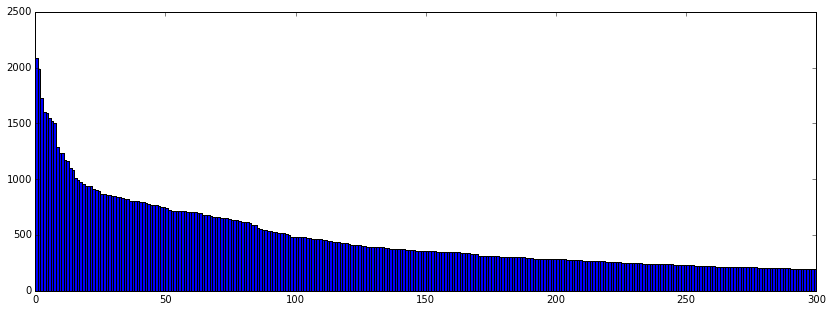

In [318]:
it_ngram_frequencies, it_sorted_gram_name, it_sorted_gram_frequency = extract_grams_data(italian_text, THRESHOLD)
print it_sorted_gram_name[:20]
plot_gram_count(it_sorted_gram_name, it_sorted_gram_frequency, THRESHOLD)

[u' th', u'the', u'he ', u' in', u'ed ', u' to', u' of', u'on ', u'of ', u'to ', u' co', u'es ', u'er ', u' an', u'ing', u'nd ', u'ng ', u'ts ', u' sa', u'in ']


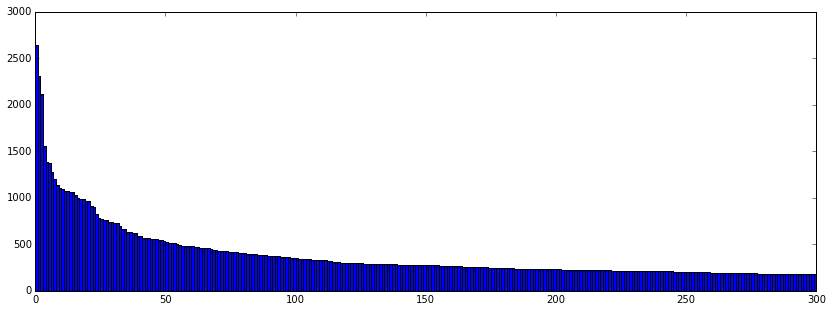

In [319]:
en_ngram_frequencies, en_sorted_gram_name, en_sorted_gram_frequency = extract_grams_data(reuters_text)
print en_sorted_gram_name[:20]
plot_gram_count(en_sorted_gram_name, en_sorted_gram_frequency, THRESHOLD)

### Test the language detection accuracy

In [324]:
print 'ITALIAN SENTENCES'
print detect_language('ciao, come ti sta andando la vita')
print detect_language('questa e la prima volta che torno a casa cosi tardi')
print detect_language('i promessi sposi si erano andanti a dormire')
print detect_language('la cittadinanza di questo paese puo essere cambiato durange la stagione delle fiere')
print detect_language('non solo fa male alla salute, ma fa piangere pure ai bambini')
print 'ENGLISH SENTENCES'
print detect_language('hello, how are you doing, what do you thing of our project')
print detect_language('this is the first time i go home so late')
print detect_language('traveling is hard, that is why we always need to work overtime')
print detect_language('our presidential elections are a mess, cause the iphones did not sell very well, the hell')
print detect_language('what the hell are you talking about')


ITALIAN SENTENCES
{'italian': 0.5329885057471264, 'english': 0.22333333333333338}
{'italian': 0.49579710144927536, 'english': 0.1894927536231884}
{'italian': 0.4068421052631579, 'english': 0.15000000000000002}
{'italian': 0.42820512820512824, 'english': 0.19679487179487176}
{'italian': 0.4247435897435897, 'english': 0.19493589743589745}
ENGLISH SENTENCES
{'italian': 0.12055555555555553, 'english': 0.24159722222222224}
{'italian': 0.23037037037037034, 'english': 0.3303703703703704}
{'italian': 0.09214285714285719, 'english': 0.32946428571428577}
{'italian': 0.22413502109704642, 'english': 0.3840506329113924}
{'italian': 0.11222222222222222, 'english': 0.3276767676767677}
